In [1]:
import rayopt as ro
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
s = ro.system_from_yaml("""
wavelengths: [405.0e-9]
fields: [0.]
object:
  angle_deg: 1
  pupil:
      radius: 0.6
stop: 1
elements:
- {diameter: 20, material: air}
- {distance: 0, roc: 55.8, diameter: 12.5, material: N-BK7}
- {distance: 1.98, roc: -40.17, diameter: 12.5, material: N-SF5}
- {distance: 1.6, roc: -116.3, diameter: 12.5, material: air}
- {distance: 10, diameter: 30, material: N-BK7}
- {offset: [0, 5.42, 34.5], diameter: 30, material: air}
- {distance: 50, diameter: 30}
""")
s.update()
s.align(s.paraxial.n)
g = ro.GeometricTrace(s)
g.rays_point((0, 0), nrays=20, distribution="radau", filter=False, clip=False)
g.refocus()
u = ro.GaussianTrace(s)
# u.refocus()

# print(s)
# print(s.paraxial)
g.rms(), u.rayleigh_range[-1, 0], s.origins[-1], np.rad2deg(s[-3].angles[0])

 # T      path    spot a    spot b  spot ang waistx dz waisty dz   waist x   waist y
 0 S         0       0.6       0.6         0         0         0       0.6       0.6
 1 S         0       0.6       0.6         0     160.9     160.9   0.02261   0.02261
 2 S      1.98    0.5926    0.5926         0     332.7     332.7   0.04241   0.04241
 3 S      3.58    0.5898    0.5898         0     88.81     88.81   0.01942   0.01942
 4 S     13.58    0.5235    0.5548         0     120.6     135.5   0.01942   0.02058
 5 S      48.5    0.3721    0.3887         0     55.98     58.49   0.01942   0.01942
 6 S     106.6   0.02383   0.01962         0    -2.082    0.4277   0.01942   0.01942



(0.0037986902866116441,
 2.9255969269262398,
 array([   0.        ,    5.42      ,  106.14639979]),
 24.910317089955509)

/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:186: RuntimeWarning: divide by zero encountered in true_divide
  return self.n[(0, -2), ]/(2*na)
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:191: RuntimeWarning: divide by zero encountered in true_divide
  return 1.22*self.wavelength/(2*na)/self.system.scale
/home/rj/work/nist/pyrayopt/rayopt/analysis.py:381: RuntimeWarning: divide by zero encountered in true_divide
  xd = (a[1] - h)/h


System: 
Scale: 1.0 mm
Wavelengths: 405 nm
Fields: 0
Object:
 Semi-Angle: 1 deg
 Pupil:
   Pupil Distance: 0
   Refractive Index: 1.00028
   Radius: 0.6
Image:
 Radius: 15
 Update Radius: True
 Pupil:
   Pupil Distance: -85.082
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 6.29934
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf         20         basic/air   1.000   1.000   89.30
 1 S          0       55.8       12.5      SCHOTT/N-BK7   1.530   1.517   64.17
 2 S       1.98     -40.17       12.5      SCHOTT/N-SF5   1.711   1.673   32.25
 3 S        1.6     -116.3       12.5         basic/air   1.000   1.000   89.30
 4 S         10        inf         30      SCHOTT/N-BK7   1.530   1.517   64.17
 5 S     34.923        inf         30         basic/air   1.000   1.000   89.30
 6 S     58.066        inf         30              None     nan     nan     nan

lagrange: -0.010477
track length: 48.08
ob

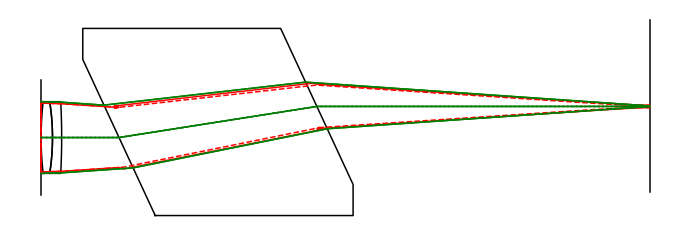

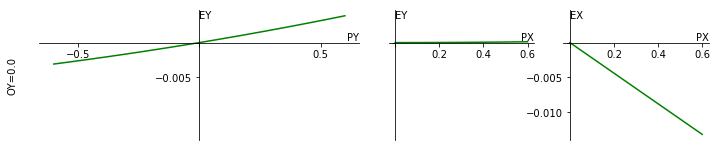

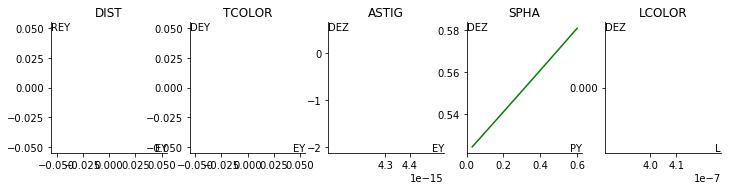

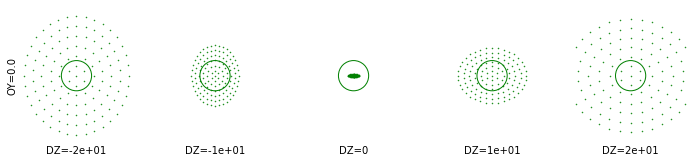

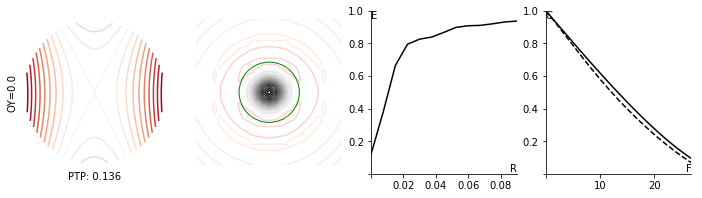

In [3]:
a = ro.Analysis(s, refocus_full=False, update=False,
                trace_gaussian=True, print_gaussian=True, plot_gaussian=True)

In [4]:
p, q, psf = g.psf()
dx = (p[0, 0] - p[1, 0])
psf[0, 0]/dx**2/psf.sum()

284.71283448153912

In [5]:
np.pi*s.object.pupil.radius**2/(s.paraxial.wavelength/s.scale*s.paraxial.focal_length[-1])**2

842.86849518176393

In [6]:
psf.sum()

1.0000000000000009